In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB  
from sklearn.naive_bayes import CategoricalNB 
from sklearn.metrics import accuracy_score as acc
import seaborn as sns


In [2]:
def league_matches(x):
    dfList = []
    for i in range(5, 21):
        df=pd.read_csv("http://www.football-data.co.uk/mmz4281/{0:02d}{1:02d}".format(i,i+1)+f"/{x}.csv",
                       error_bad_lines=False,encoding='latin1')
        
        df = df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS', 'AS','B365H', 'B365D', 'B365A']]
        dfList.append(df)
        Data = dfList[0].append(dfList[1:])
    return Data

      

In [3]:
%%time
Bundesliga=league_matches('D1')
EPL=league_matches('E0')
LaLiga=league_matches('SP1')
SerieA=league_matches('I1')

CPU times: user 1.54 s, sys: 257 ms, total: 1.8 s
Wall time: 1min 7s


In [4]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,05/08/05,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50
1,06/08/05,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25
2,06/08/05,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00
3,06/08/05,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50
4,06/08/05,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60
...,...,...,...,...,...,...,...,...,...,...,...
58,07/11/2020,Stuttgart,Ein Frankfurt,2,2,D,16,15,2.55,3.60,2.50
59,07/11/2020,Union Berlin,Bielefeld,5,0,H,9,5,1.83,3.75,4.20
60,07/11/2020,Dortmund,Bayern Munich,2,3,A,15,16,4.00,4.33,1.75
61,08/11/2020,Wolfsburg,Hoffenheim,2,1,H,14,17,2.10,3.60,3.25


In [5]:
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00
1,13/08/05,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87
3,13/08/05,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40
...,...,...,...,...,...,...,...,...,...,...,...
73,07/11/2020,West Ham,Fulham,1.0,0.0,H,16.0,13.0,1.83,3.75,4.20
74,08/11/2020,West Brom,Tottenham,0.0,1.0,A,12.0,19.0,7.00,4.33,1.45
75,08/11/2020,Leicester,Wolves,1.0,0.0,H,10.0,7.0,2.30,3.20,3.25
76,08/11/2020,Man City,Liverpool,1.0,1.0,D,7.0,10.0,1.95,4.20,3.40


In [6]:
LaLiga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50
1,27/08/05,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25
2,27/08/05,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25
3,28/08/05,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00
4,28/08/05,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44
...,...,...,...,...,...,...,...,...,...,...,...
78,08/11/2020,Getafe,Villarreal,1,3,A,13,9,2.50,3.10,3.00
79,08/11/2020,Sociedad,Granada,2,0,H,22,2,1.65,3.80,5.25
80,08/11/2020,Levante,Alaves,1,1,D,18,6,2.15,3.40,3.40
81,08/11/2020,Valladolid,Ath Bilbao,2,1,H,7,17,3.30,2.90,2.37


In [7]:
EPL.isnull().sum()

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HS          1
AS          1
B365H       1
B365D       1
B365A       1
dtype: int64

In [8]:
EPL_isna = EPL[EPL.isna().any(axis=1)]

In [9]:
EPL_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
EPL=EPL.dropna()

In [11]:
SerieA_isna = SerieA[SerieA.isna().any(axis=1)]

In [12]:
SerieA_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
85,26/10/05,Lazio,Chievo,2.0,2.0,D,NaN,NaN,2.00,3.00,4.00
132,04/12/05,Fiorentina,Juventus,1.0,2.0,A,NaN,NaN,2.87,3.00,2.30
133,04/12/05,Lazio,Siena,3.0,2.0,H,NaN,NaN,1.80,3.00,4.33
134,04/12/05,Lecce,Roma,2.0,2.0,D,NaN,NaN,3.25,3.00,2.10
135,04/12/05,Palermo,Cagliari,2.0,2.0,D,NaN,NaN,1.61,3.25,5.50
136,04/12/05,Reggina,Parma,2.0,1.0,H,NaN,NaN,1.90,3.00,3.80
137,04/12/05,Sampdoria,Empoli,2.0,0.0,H,NaN,NaN,1.66,3.20,5.00
138,04/12/05,Treviso,Messina,0.0,0.0,D,NaN,NaN,2.40,2.75,3.00
139,04/12/05,Udinese,Livorno,0.0,2.0,A,NaN,NaN,1.80,3.00,4.33
140,10/12/05,Fiorentina,Treviso,1.0,0.0,H,NaN,NaN,1.28,5.00,10.00


In [13]:
SerieA.dropna(axis = 0, how = 'all', inplace = True)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25
1,27/08/05,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00
2,28/08/05,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40
3,28/08/05,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00
4,28/08/05,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00
...,...,...,...,...,...,...,...,...,...,...,...
65,08/11/2020,Atalanta,Inter,1.0,1.0,D,9.0,10.0,2.60,3.90,2.35
66,08/11/2020,Genoa,Roma,1.0,3.0,A,7.0,18.0,5.75,4.20,1.53
67,08/11/2020,Torino,Crotone,0.0,0.0,D,5.0,7.0,1.95,3.75,3.60
68,08/11/2020,Bologna,Napoli,0.0,1.0,A,6.0,8.0,4.75,4.20,1.65


In [14]:
#There´s different date formats, so let´s homogenize them, to convert them to datetime type
def date_correction(y):
    x=y.split('/')
    if len(x[-1])==2:
        aux='20'+x[-1]
        x.pop(-1)
        x.append(aux)
    else:
        pass
    return ('/'.join(x))


In [15]:
Bundesliga['Date']=Bundesliga['Date'].apply(date_correction)
EPL['Date']=EPL['Date'].apply(date_correction)
LaLiga['Date']=LaLiga['Date'].apply(date_correction)
SerieA['Date']=SerieA['Date'].apply(date_correction)

In [16]:
##adding season column to the df
%pprint
lst=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst.append(a)
    
lst
lst=sorted(lst*380) #This list works for leagues that has 20 teams, and 380 games per season
lst=['20'+x for x in lst]

lst_bundes=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst_bundes.append(a)
    
lst_bundes=sorted(lst_bundes*306) #This list works Bundesliga that has 18 teams, and 306 games per season
lst_bundes=['20'+x for x in lst_bundes]



Pretty printing has been turned OFF


In [17]:
def add_season(league):
    a=len(lst)-len(league['Date'])
    ##to fit the dataframe knowing the difference of the length of the list and the rows
    lista=lst[:-a]
    league['season']=lista
    
    return league

In [18]:
add_season(LaLiga)
LaLiga


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50,200506
1,27/08/2005,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25,200506
2,27/08/2005,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25,200506
3,28/08/2005,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00,200506
4,28/08/2005,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
78,08/11/2020,Getafe,Villarreal,1,3,A,13,9,2.50,3.10,3.00,202021
79,08/11/2020,Sociedad,Granada,2,0,H,22,2,1.65,3.80,5.25,202021
80,08/11/2020,Levante,Alaves,1,1,D,18,6,2.15,3.40,3.40,202021
81,08/11/2020,Valladolid,Ath Bilbao,2,1,H,7,17,3.30,2.90,2.37,202021


In [19]:
add_season(EPL)
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,13/08/2005,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00,200506
1,13/08/2005,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72,200506
2,13/08/2005,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87,200506
3,13/08/2005,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00,200506
4,13/08/2005,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
73,07/11/2020,West Ham,Fulham,1.0,0.0,H,16.0,13.0,1.83,3.75,4.20,202021
74,08/11/2020,West Brom,Tottenham,0.0,1.0,A,12.0,19.0,7.00,4.33,1.45,202021
75,08/11/2020,Leicester,Wolves,1.0,0.0,H,10.0,7.0,2.30,3.20,3.25,202021
76,08/11/2020,Man City,Liverpool,1.0,1.0,D,7.0,10.0,1.95,4.20,3.40,202021


In [20]:
add_season(SerieA)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25,200506
1,27/08/2005,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00,200506
2,28/08/2005,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40,200506
3,28/08/2005,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00,200506
4,28/08/2005,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
65,08/11/2020,Atalanta,Inter,1.0,1.0,D,9.0,10.0,2.60,3.90,2.35,202021
66,08/11/2020,Genoa,Roma,1.0,3.0,A,7.0,18.0,5.75,4.20,1.53,202021
67,08/11/2020,Torino,Crotone,0.0,0.0,D,5.0,7.0,1.95,3.75,3.60,202021
68,08/11/2020,Bologna,Napoli,0.0,1.0,A,6.0,8.0,4.75,4.20,1.65,202021


In [21]:
b=len(lst_bundes)-len(Bundesliga['Date'])
lista_b=lst_bundes[:-b]
Bundesliga['season']=lista_b

In [22]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
58,07/11/2020,Stuttgart,Ein Frankfurt,2,2,D,16,15,2.55,3.60,2.50,202021
59,07/11/2020,Union Berlin,Bielefeld,5,0,H,9,5,1.83,3.75,4.20,202021
60,07/11/2020,Dortmund,Bayern Munich,2,3,A,15,16,4.00,4.33,1.75,202021
61,08/11/2020,Wolfsburg,Hoffenheim,2,1,H,14,17,2.10,3.60,3.25,202021


# Shots and Goals Analysis

Let´s find out how many shots go up in the final score, in other words the shot efficency.

In [23]:
def shots(league):
    league_shots=league.copy()
    league_shots.drop(['B365H','B365D','B365A'],axis=1,inplace=True)
    league_shots['HomeConversion'] = league_shots.apply(lambda row: round((row.FTHG/row.HS)*100,2) if row.HS !=0 else 0, axis=1)
    league_shots['AwayConversion'] = league_shots.apply(lambda row: round((row.FTAG/row.AS)*100,2) if row.AS !=0 else 0, axis=1)
    home_shots=league_shots.groupby(['HomeTeam'])['HS'].mean()
    home_shots.sort_values(axis=0, ascending=False, inplace=True)
    away_shots=league_shots.groupby(['AwayTeam'])['AS'].mean()
    away_shots.sort_values(axis=0, ascending=False, inplace=True)
    home_conversion= league_shots.groupby(['HomeTeam'])['HomeConversion'].mean()
    home_conversion.sort_values(axis=0, ascending=False, inplace=True)
    away_conversion= league_shots.groupby(['AwayTeam'])['AwayConversion'].mean()
    away_conversion.sort_values(axis=0, ascending=False, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 2)
    plt.sca(axes[0][0])
    home_shots[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Average Shots')
    plt.title('Home Shots (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_shots[:10].plot(kind = 'bar',alpha = 0.5,color='blue')
    plt.ylabel('Average Shots')
    plt.title('Away Shots (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_conversion[:10].plot(kind='bar',color='yellow',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Home Conversion (2005/06 to 2020/21)')
    
    plt.sca(axes[1][1])
    away_conversion[:10].plot(kind='bar',color='green',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Away Conversion (2005/06 to 2020/21)') 
    
    fig.tight_layout(pad=1)
    
    plt.savefig('Shots_analysis.png',bbox_inches='tight')
    return fig,axes
    

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11792dd60>,
      dtype=object))

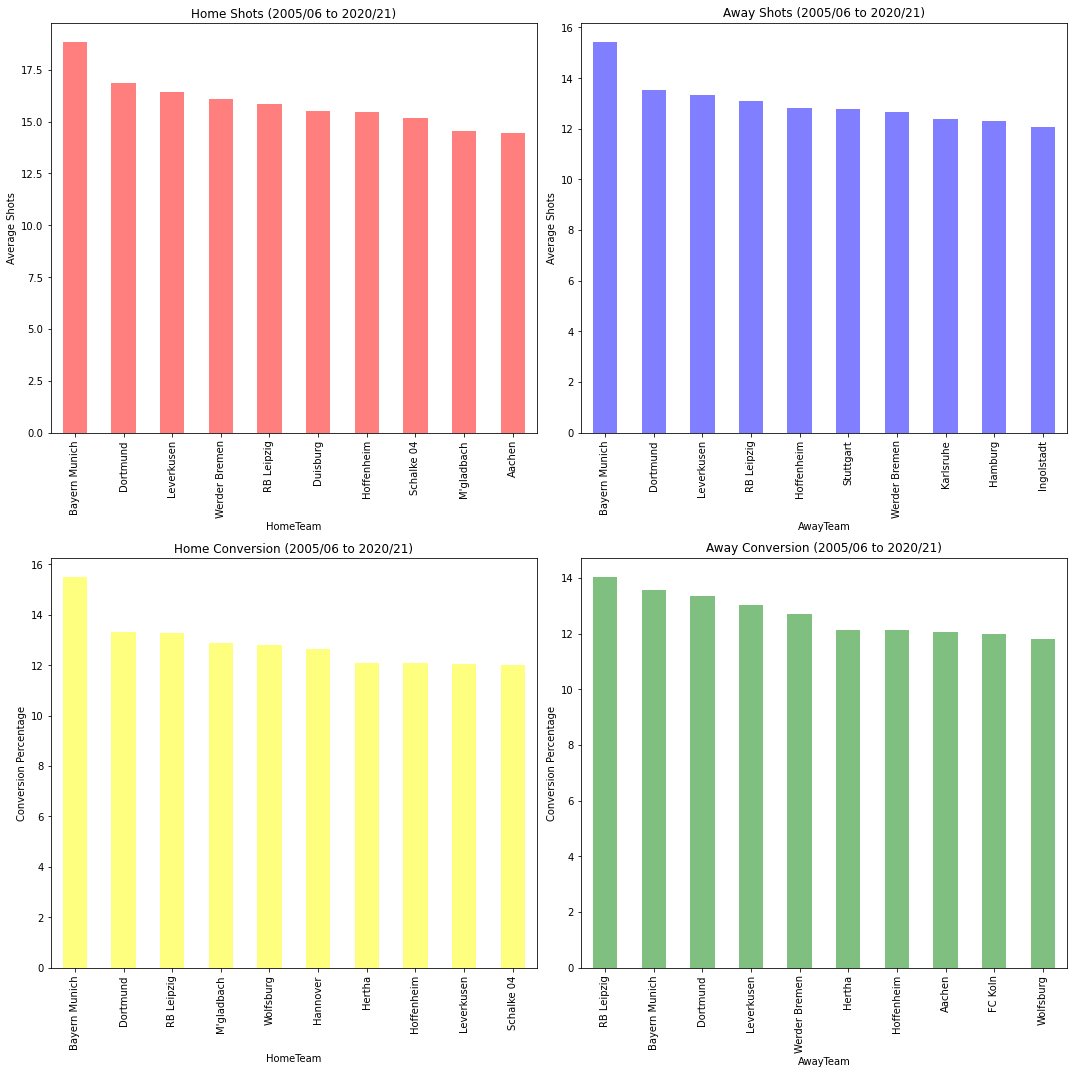

In [24]:
shots(Bundesliga)

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c38eb0>,
      dtype=object))

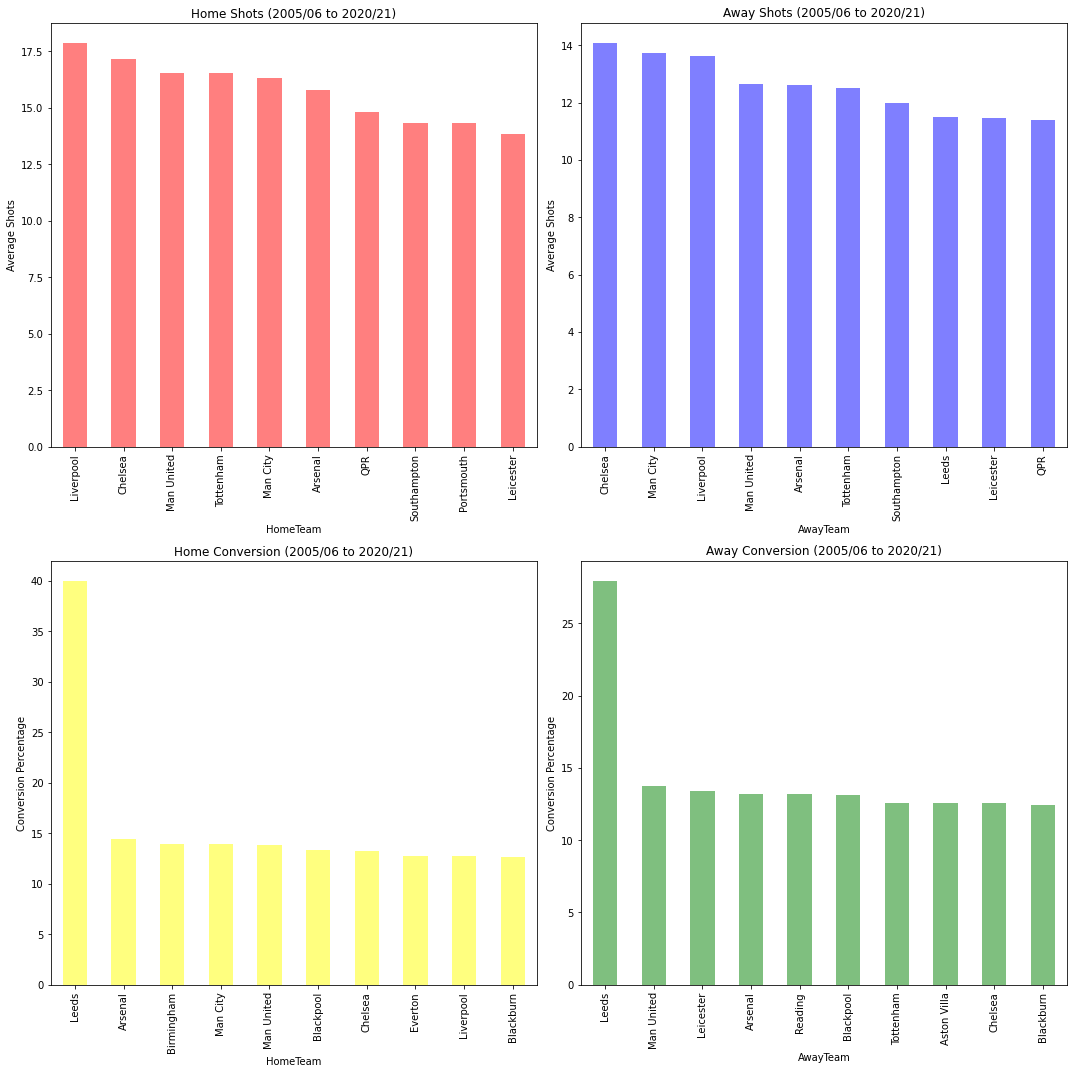

In [25]:
shots(EPL)

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11792d3d0>,
      dtype=object))

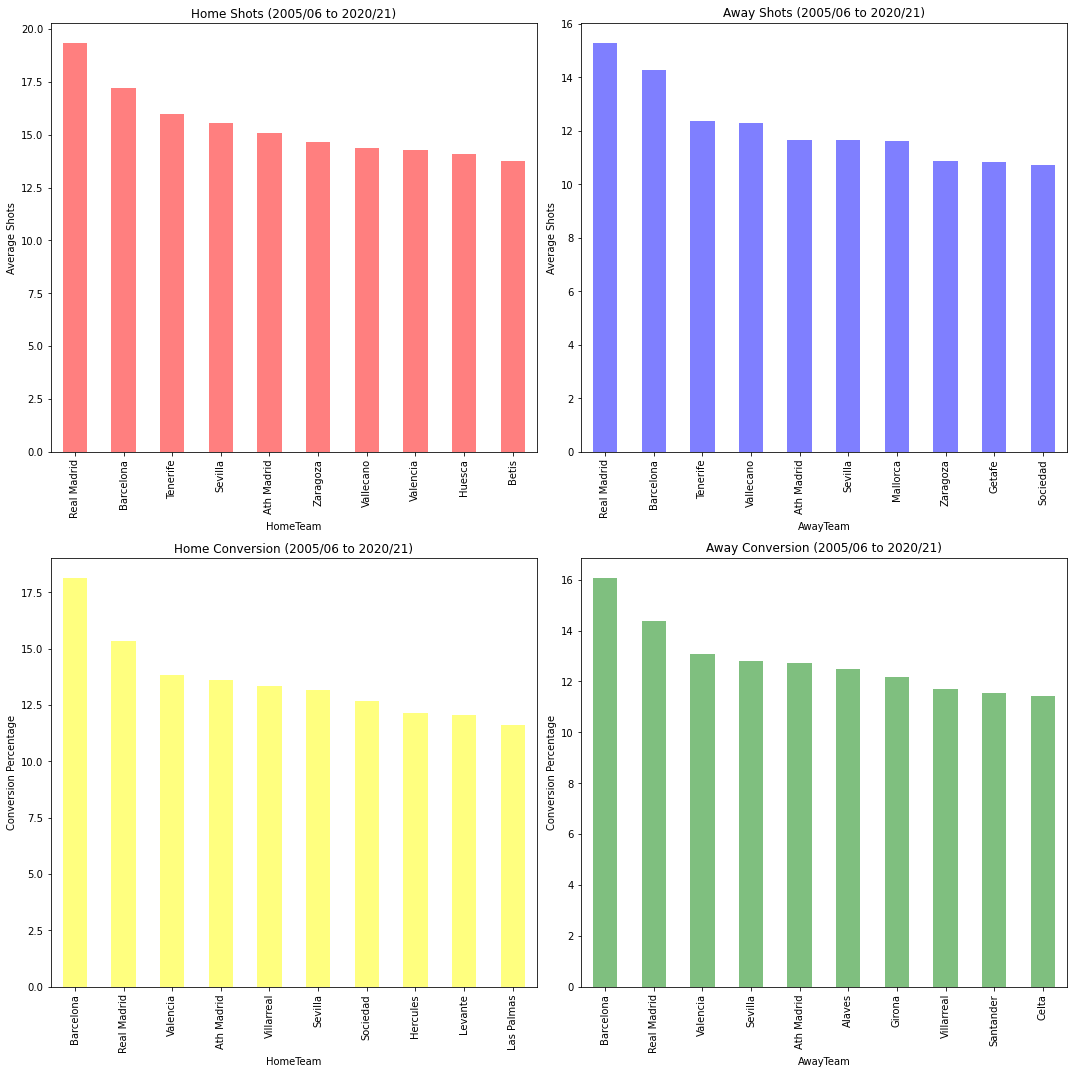

In [26]:
shots(LaLiga)

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187806a0>,
      dtype=object))

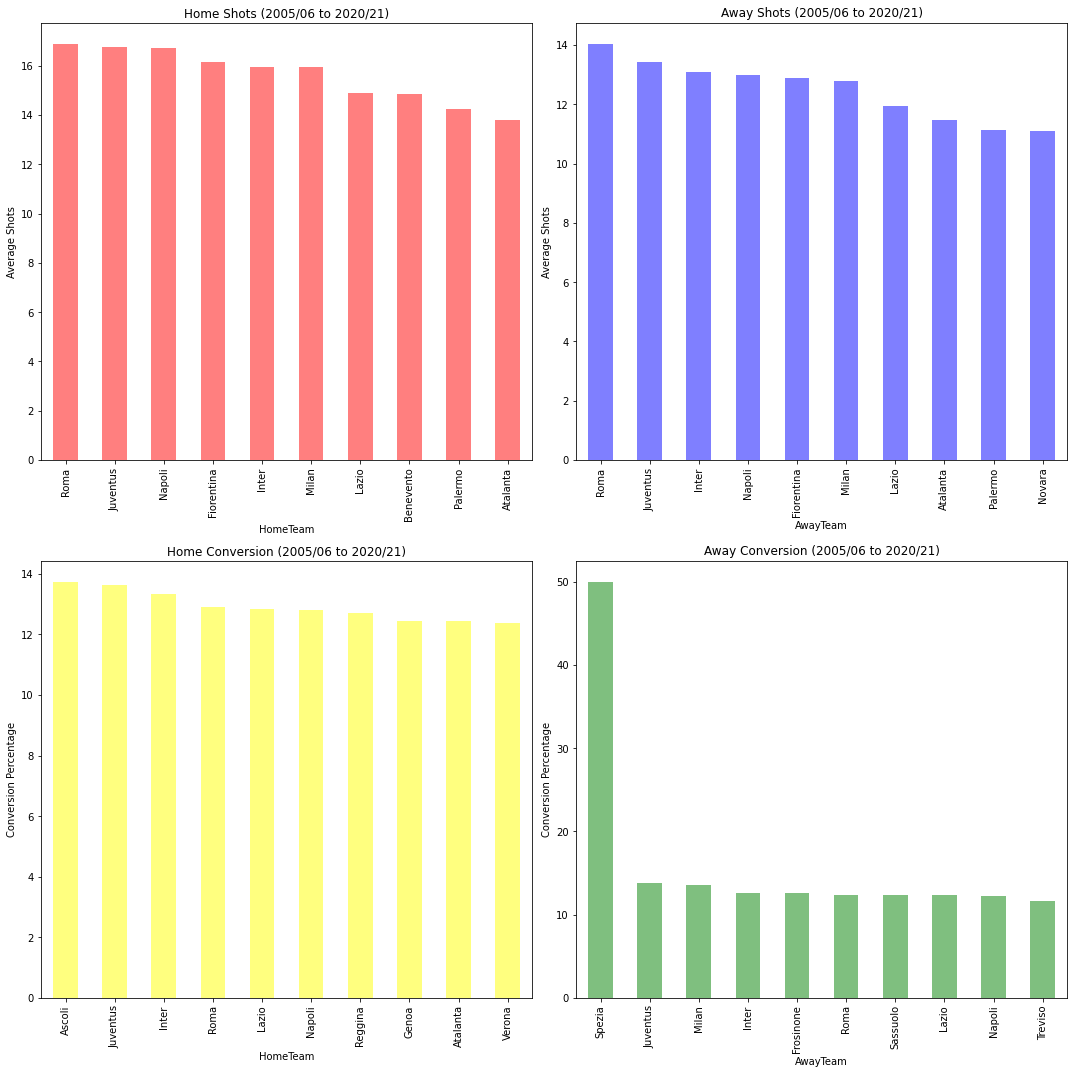

In [27]:
shots(SerieA)

In [25]:
def goals(league):
    goals=league.copy()
    home_goals=goals.groupby(['HomeTeam'])['FTHG'].sum()
    home_goals.sort_values(axis=0, ascending=False, inplace=True)
    away_goals=goals.groupby(['AwayTeam'])['FTAG'].sum()
    away_goals.sort_values(axis=0, ascending=False, inplace=True)
    total_goals=home_goals+away_goals
    total_goals.sort_values(axis=0, ascending=True, inplace=True)
    home_mean=goals.groupby(['HomeTeam'])['FTHG'].mean()
    home_mean.sort_values(axis=0, ascending=False, inplace=True)
    away_mean=goals.groupby(['AwayTeam'])['FTAG'].mean()
    away_mean.sort_values(axis=0, ascending=False, inplace=True)
    total_mean=(home_mean+away_mean)/2
    total_mean.sort_values(axis=0, ascending=True, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 3)
    plt.sca(axes[0][0])
    home_goals[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Goals')
    plt.title('Home Goals (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_goals[:10].plot(kind = 'bar',alpha = 0.5,color='yellow')
    plt.ylabel('Goals')
    plt.title('Away Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[0][2])
    total_goals.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_mean[:10].plot(kind = 'bar',color='orange',alpha = 0.5)
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')

    plt.sca(axes[1][1])
    away_mean[:10].plot(kind = 'bar',alpha = 0.5,color='brown')
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')
    
    plt.sca(axes[1][2])
    total_mean.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Average per Game (2005/06 to 2020/21)')
    
    fig.tight_layout(pad=1)
    return fig,axes
    
    
    
    

(<Figure size 1080x1080 with 6 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116714d60>,
      dtype=object))

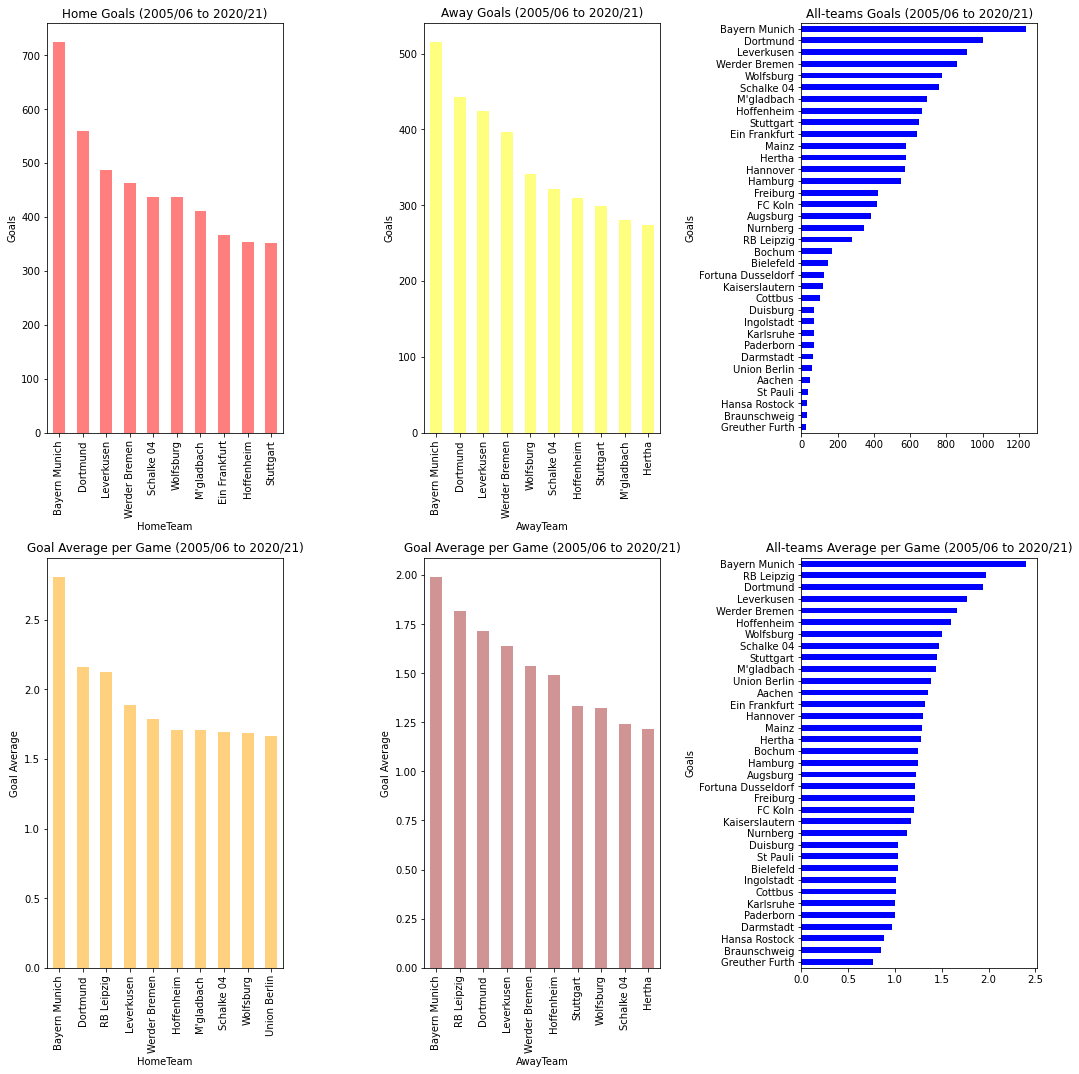

In [26]:
goals(Bundesliga)

(<Figure size 1080x1080 with 6 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9a0910>,
      dtype=object))

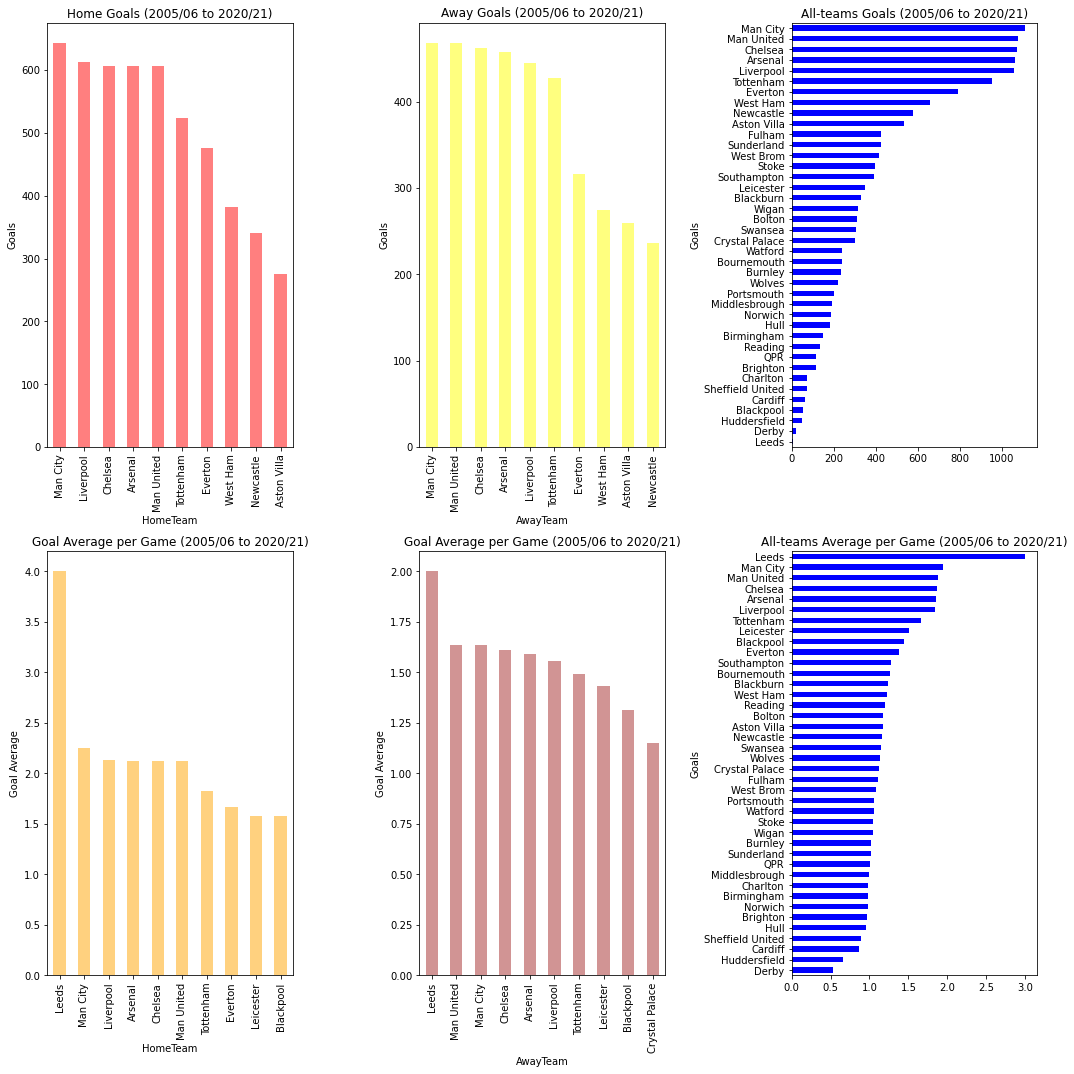

In [30]:
goals(EPL)

(<Figure size 1080x1080 with 6 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b35a790>,
      dtype=object))

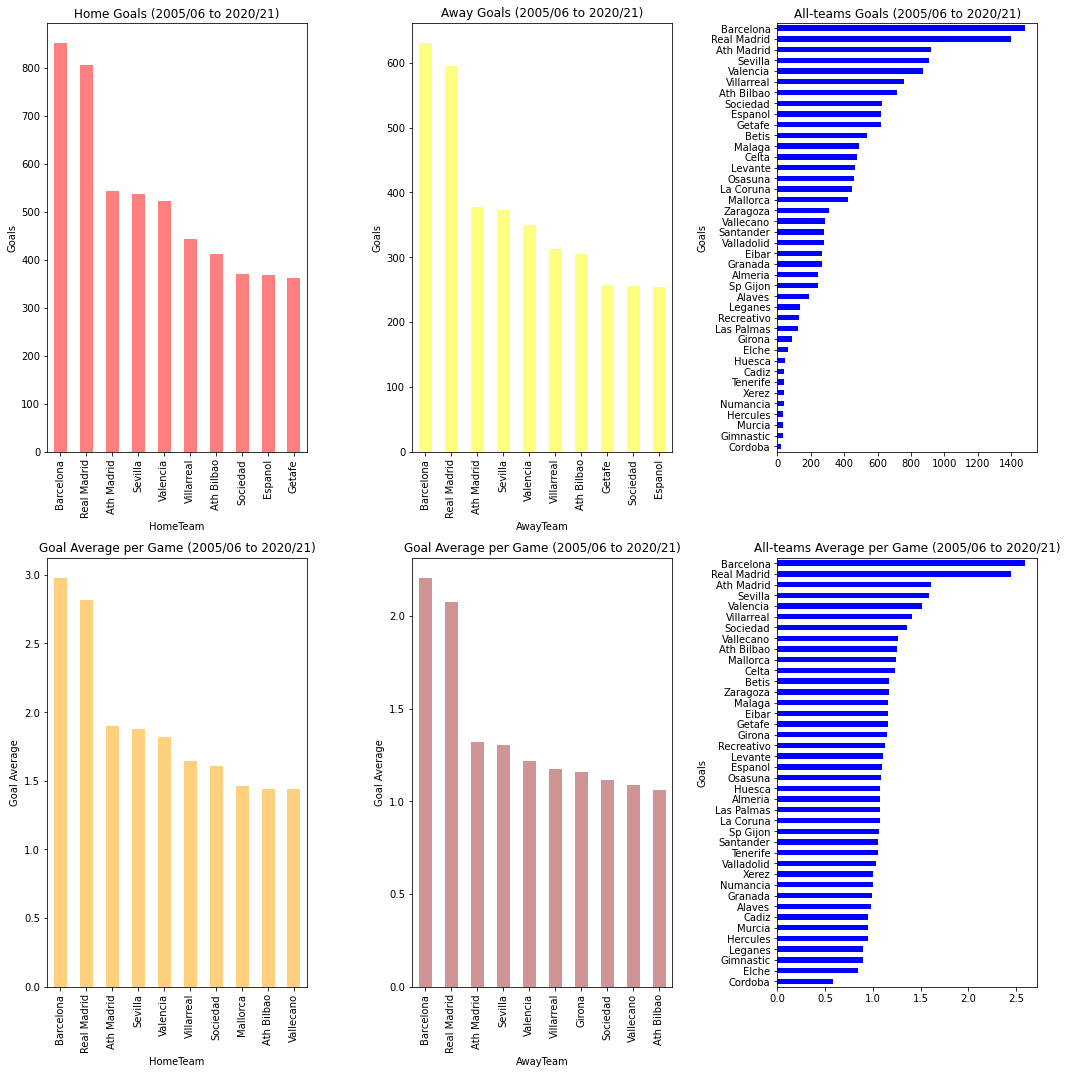

In [31]:
goals(LaLiga)

(<Figure size 1080x1080 with 6 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6992b0>,
      dtype=object))

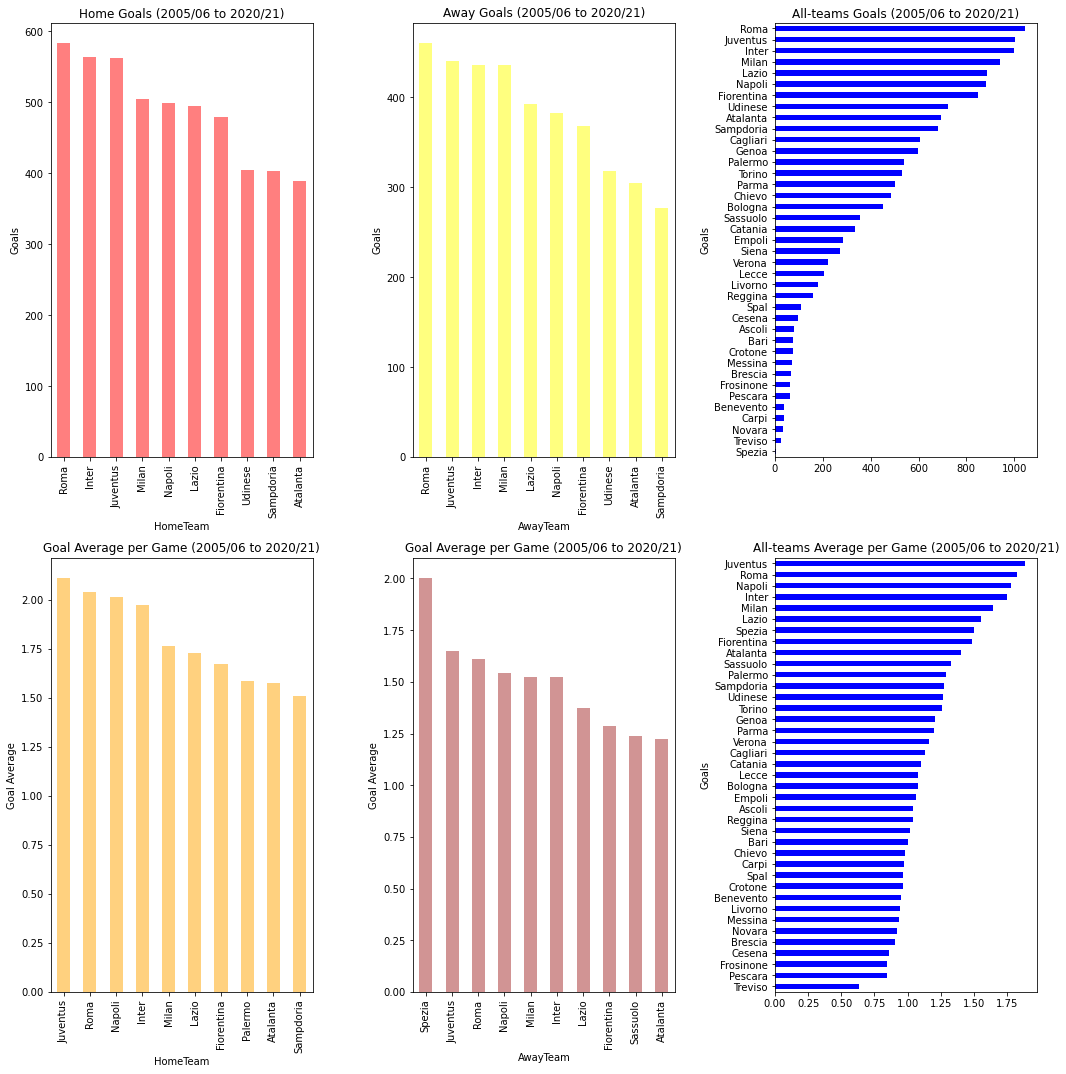

In [32]:
goals(SerieA)

In [33]:

total_df=pd.concat([Bundesliga,EPL,LaLiga,SerieA],axis=0)

In [34]:
total_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3.0,0.0,H,19.0,10.0,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1.0,1.0,D,11.0,11.0,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1.0,0.0,H,14.0,19.0,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3.0,0.0,H,12.0,17.0,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2.0,2.0,D,12.0,15.0,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
15,27/09/2020,Roma,Juventus,2.0,2.0,D,7.0,6.0,3.60,3.60,2.00,202021
16,28/09/2020,Bologna,Parma,4.0,1.0,H,11.0,8.0,1.95,3.60,3.60,202021
17,30/09/2020,Benevento,Inter,2.0,5.0,A,11.0,18.0,9.00,4.75,1.36,202021
18,30/09/2020,Udinese,Spezia,0.0,2.0,A,10.0,4.0,1.60,3.75,5.75,202021


In [35]:
total0506=total_df[total_df['season']=='200506']
total0607=total_df[total_df['season']=='200607']
total0708=total_df[total_df['season']=='200708']
total0809=total_df[total_df['season']=='200809']
total0910=total_df[total_df['season']=='200910']
total1011=total_df[total_df['season']=='201011']
total1112=total_df[total_df['season']=='201112']
total1213=total_df[total_df['season']=='201213']
total1314=total_df[total_df['season']=='201314']
total1415=total_df[total_df['season']=='201415']
total1516=total_df[total_df['season']=='201516']
total1617=total_df[total_df['season']=='201617']
total1718=total_df[total_df['season']=='201718']
total1819=total_df[total_df['season']=='201819']
total1920=total_df[total_df['season']=='201920']

In [36]:
def goals_total(goals):  
    home_goals=goals.groupby(['HomeTeam'])['FTHG'].sum()
    home_goals.sort_values(axis=0, ascending=False, inplace=True)
    away_goals=goals.groupby(['AwayTeam'])['FTAG'].sum()
    away_goals.sort_values(axis=0, ascending=False, inplace=True)
    total_goals=home_goals+away_goals
    total_goals.sort_values(axis=0, ascending=False, inplace=True)
    return total_goals[:10]

In [37]:
goals_0506=goals_total(total0506)
goals_0607=goals_total(total0607)
goals_0708=goals_total(total0708)
goals_0809=goals_total(total0809)
goals_0910=goals_total(total0910)
goals_1011=goals_total(total1011)
goals_1112=goals_total(total1112)
goals_1213=goals_total(total1213)
goals_1314=goals_total(total1314)
goals_1415=goals_total(total1415)
goals_1516=goals_total(total1516)
goals_1617=goals_total(total1617)
goals_1718=goals_total(total1718)
goals_1819=goals_total(total1819)
goals_1920=goals_total(total1920)

In [38]:
ghj=pd.DataFrame(goals_1819)
gj=pd.DataFrame(goals_1920)
gj

,0
Man City,102.0
Bayern Munich,100.0
Atalanta,98.0
Barcelona,86.0
Liverpool,85.0
Dortmund,84.0
Inter,81.0
RB Leipzig,81.0
Lazio,79.0
Roma,77.0


In [39]:
new=pd.concat([goals_1920,goals_1819])

In [40]:
new

Man City         102.0
Bayern Munich    100.0
Atalanta          98.0
Barcelona         86.0
Liverpool         85.0
Dortmund          84.0
Inter             81.0
RB Leipzig        81.0
Lazio             79.0
Roma              77.0
Man City          95.0
Barcelona         90.0
Liverpool         89.0
Bayern Munich     88.0
Dortmund          81.0
Atalanta          77.0
Napoli            74.0
Arsenal           73.0
Hoffenheim        70.0
Juventus          70.0
dtype: float64

# Poisson Distribution

The analysis of this distribution will consist on applying the model to a fixed season, taking into account the previous four, in order to check the effectiveness of the distribution

In [28]:
#defining a function to arrange each dataframe per season, starting in the 2008-09 season (the first one to posses
# four previous record seasons)

def df_array(season_number,league):
    league['season']=league['season'].astype(str).astype(int)
    s_df=league.loc[(league.season >= season_number-303) & (league.season <= season_number)] 
    #303 represents going further 3 seasons
    return s_df


In [29]:
%%time
#let´s check the effectiveness choosing 4 seasons to test, the ones that group 3 previous seasons:
#2021: 1920,1819,1718
#1617: 1516,1415,1314
#1213: 1112,1011,0910
#0809: 0708,0607,0506


season_08_09=df_array(200809,Bundesliga)
season_12_13=df_array(201213,Bundesliga)
season_16_17=df_array(201617,Bundesliga)
season_20_21=df_array(202021,Bundesliga)


CPU times: user 36.2 ms, sys: 16.8 ms, total: 53 ms
Wall time: 56.6 ms


In [38]:
##Adding the expected goals based on poisson distribution with the data from the previous 5 tournaments
def teams_strength_and_predictor(df,home,away):
    HomeTeam = df[['HomeTeam', 'FTHG', 'FTAG']].rename(
        columns={'HomeTeam':'Team', 'FTHG':'HomeScored', 'FTAG':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()

    AwayTeam = df[['AwayTeam', 'FTHG', 'FTAG']].rename(
        columns={'AwayTeam':'Team', 'FTHG':'AwayConceded', 'FTAG':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

    # Overall - Average {leagueHomeScored, leagueHomeConceded, leagueAwayScored, leagueAwayConceded}
    leagueHomeScored, leagueHomeConceded = HomeTeam['HomeScored'].mean(), HomeTeam['HomeConceded'].mean()
    leagueAwayScored, leagueAwayConceded = AwayTeam['AwayScored'].mean(), AwayTeam['AwayConceded'].mean()

    TeamStrength = pd.merge(HomeTeam, AwayTeam, on='Team')

    assert(leagueHomeScored != 0)
    assert(leagueHomeConceded != 0)
    assert(leagueAwayScored != 0)
    assert(leagueAwayConceded != 0)

    # Normalize the parameters 
    # For each team - {HomeAttack, HomeDefence, AwayAttack, AwayDefense}
    TeamStrength['HomeScored'] /= leagueHomeScored
    TeamStrength['HomeConceded'] /= leagueHomeConceded
    TeamStrength['AwayScored'] /= leagueAwayScored
    TeamStrength['AwayConceded'] /= leagueAwayConceded

    TeamStrength.columns=['Team','HomeAttack','HomeDefense','AwayAttack','AwayDefense']
    TeamStrength.set_index('Team', inplace=True)
    overallHomeScored = (leagueHomeScored+leagueAwayConceded)/2
    overallAwayScored = (leagueHomeConceded+leagueAwayScored)/2
    
    #after getting teams strength, we preceed to find the probabilities and expected scores
    
    if home in TeamStrength.index and away in TeamStrength.index:
        H = TeamStrength.at[home,'HomeAttack'] * TeamStrength.at[away,'AwayDefense'] * overallHomeScored
        A = TeamStrength.at[away,'AwayAttack'] * TeamStrength.at[home,'HomeDefense'] * overallAwayScored
        probH, probA, probT = 0, 0, 0  # Probability of Home win(H), Away win(A) or Tie(T) 
        for X in range(0,10):
            for Y in range(0, 10):
                p = poisson.pmf(X,H) * poisson.pmf(Y,A)
                if X == Y:
                    probT += p
                elif X > Y:
                    probH += p
                else:
                    probA += p
        HomeProb=round(probH*100,2)
        TieProb=round(probT*100,2)
        AwayProb=round(probA*100,2)
        scoreH = round(3 * probH + probT,2)
        scoreA = round(3 * probA + probT,2)
        return (scoreH,scoreA,HomeProb,TieProb,AwayProb)
    else:
        return (0,0,0,0,0)


In [39]:
teams_strength_and_predictor(s2021,'Bayern Munich','Werder Bremen')

(2.5, 0.37, 79.27, 12.65, 7.98)

In [31]:
def predictor(season):
    dummy=season.copy()
    Home_goals=[]
    Away_goals=[]
    home_chance=[]
    tie_chance=[]
    away_chance=[]
    for index, row in dummy.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        rH,rA,cH,cT,cA = teams_strength_and_predictor(season,home,away)
        Home_goals.append(round(rH,2))
        Away_goals.append(round(rA,2))
        home_chance.append(round(cH,2))
        tie_chance.append(round(cT,2))
        away_chance.append(round(cA,2))
    
    dummy['HomeExpectedGoals']=Home_goals
    dummy['AwayExpectedGoals']=Away_goals
    dummy['HomeProbability']=home_chance
    dummy['TieProbability']=tie_chance
    dummy['AwayProbability']=away_chance
    
    return dummy
    
    

In [32]:
%%time
#Here the function gets the Poisson prediction for every season since 08_09

#s0809=predictor(season_08_09)

#s1213=predictor(season_12_13)

#s1617=predictor(season_16_17)

s2021=predictor(season_20_21)


CPU times: user 58 s, sys: 527 ms, total: 58.5 s
Wall time: 59.4 s


In [33]:
s2021

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,18/08/2017,Bayern Munich,Leverkusen,3,1,H,13,19,1.25,6.00,12.00,201718,2.25,0.59,69.46,16.11,14.37
1,19/08/2017,Hamburg,Augsburg,1,0,H,11,13,2.10,3.40,3.60,201718,1.51,1.18,39.96,30.95,29.09
2,19/08/2017,Hertha,Stuttgart,2,0,H,10,9,2.00,3.40,3.90,201718,1.64,1.11,46.51,24.74,28.74
3,19/08/2017,Hoffenheim,Werder Bremen,1,0,H,14,11,1.75,4.00,4.33,201718,1.51,1.25,42.33,23.87,33.80
4,19/08/2017,Mainz,Hannover,0,1,A,14,6,2.00,3.40,4.00,201718,1.88,0.89,55.02,23.11,21.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,07/11/2020,Stuttgart,Ein Frankfurt,2,2,D,16,15,2.55,3.60,2.50,202021,1.42,1.30,38.30,27.52,34.18
59,07/11/2020,Union Berlin,Bielefeld,5,0,H,9,5,1.83,3.75,4.20,202021,2.53,0.32,79.09,15.31,5.58
60,07/11/2020,Dortmund,Bayern Munich,2,3,A,15,16,4.00,4.33,1.75,202021,1.11,1.68,30.14,20.71,49.14
61,08/11/2020,Wolfsburg,Hoffenheim,2,1,H,14,17,2.10,3.60,3.25,202021,1.11,1.67,29.41,22.60,47.99


In [83]:
s0809

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50,200506,2.59,0.28,82.38,12.32,5.26
1,06/08/2005,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25,200506,0.92,1.84,22.91,23.40,53.69
2,06/08/2005,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00,200506,1.34,1.37,34.91,29.29,35.79
3,06/08/2005,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50,200506,1.98,0.76,57.20,26.09,16.72
4,06/08/2005,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60,200506,1.54,1.22,43.51,23.85,32.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23/05/2009,FC Koln,Bochum,1,1,D,20,15,2.10,3.40,3.40,200809,1.03,1.70,25.60,26.35,48.05
302,23/05/2009,Karlsruhe,Hertha,4,0,H,16,12,4.50,4.20,1.67,200809,1.34,1.39,35.44,27.43,37.13
303,23/05/2009,M'gladbach,Dortmund,1,1,D,10,9,3.75,3.60,1.91,200809,1.39,1.35,37.53,26.25,36.22
304,23/05/2009,Schalke 04,Hoffenheim,2,3,A,15,16,1.83,3.75,4.00,200809,1.81,0.97,53.10,22.02,24.88


In [84]:

seasons_poisson=pd.concat([s0809,s1213,s1617,s2021])
seasons_poisson.drop(['HS','AS','B365H','B365D','B365A'], axis=1, inplace=True)
seasons_poisson


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,200506,2.59,0.28,82.38,12.32,5.26
1,06/08/2005,Duisburg,Stuttgart,1,1,D,200506,0.92,1.84,22.91,23.40,53.69
2,06/08/2005,FC Koln,Mainz,1,0,H,200506,1.34,1.37,34.91,29.29,35.79
3,06/08/2005,Hamburg,Nurnberg,3,0,H,200506,1.98,0.76,57.20,26.09,16.72
4,06/08/2005,Hannover,Hertha,2,2,D,200506,1.54,1.22,43.51,23.85,32.64
...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,202021,1.84,0.92,53.41,24.02,22.56
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,202021,2.32,0.52,71.78,16.31,11.88
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,202021,1.17,1.57,30.11,26.16,43.73
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,202021,0.61,2.22,14.58,16.92,68.48


In [86]:
selected_seasons=[200809,201213,201617,202021]
final_poisson = seasons_poisson[seasons_poisson['season'].isin(selected_seasons)] 
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,15/08/2008,Bayern Munich,Hamburg,2,2,D,200809,1.93,0.83,56.41,23.88,19.70
1,16/08/2008,Bielefeld,Werder Bremen,2,2,D,200809,0.93,1.83,23.20,23.60,53.20
2,16/08/2008,Cottbus,Hoffenheim,0,3,A,200809,0.98,1.81,25.84,20.83,53.32
3,16/08/2008,Karlsruhe,Bochum,1,0,H,200809,1.27,1.45,32.68,28.57,38.76
4,16/08/2008,Leverkusen,Dortmund,2,3,A,200809,1.74,1.03,50.52,22.72,26.76
...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,202021,1.84,0.92,53.41,24.02,22.56
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,202021,2.32,0.52,71.78,16.31,11.88
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,202021,1.17,1.57,30.11,26.16,43.73
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,202021,0.61,2.22,14.58,16.92,68.48


In [87]:
def predicted(row):
    if (row['HomeProbability']-row['AwayProbability'])<=5.0 and (row['AwayProbability']-row['HomeProbability'])<=5.0:
        res='D'
    elif row['HomeProbability']>row['AwayProbability'] and row['HomeProbability']>row['TieProbability']:
        res='H'
    elif row['HomeProbability']<row['AwayProbability'] and row['AwayProbability']>row['TieProbability']:
        res='A'
    elif row['HomeProbability']<row['TieProbability'] and row['AwayProbability']<row['TieProbability']:
        res='D'
    
    return res

In [88]:
final_poisson['PoissonPredicted']=final_poisson.apply(predicted,axis=1)

In [89]:
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,PoissonPredicted
0,15/08/2008,Bayern Munich,Hamburg,2,2,D,200809,1.93,0.83,56.41,23.88,19.70,H
1,16/08/2008,Bielefeld,Werder Bremen,2,2,D,200809,0.93,1.83,23.20,23.60,53.20,A
2,16/08/2008,Cottbus,Hoffenheim,0,3,A,200809,0.98,1.81,25.84,20.83,53.32,A
3,16/08/2008,Karlsruhe,Bochum,1,0,H,200809,1.27,1.45,32.68,28.57,38.76,A
4,16/08/2008,Leverkusen,Dortmund,2,3,A,200809,1.74,1.03,50.52,22.72,26.76,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,202021,1.84,0.92,53.41,24.02,22.56,H
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,202021,2.32,0.52,71.78,16.31,11.88,H
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,202021,1.17,1.57,30.11,26.16,43.73,A
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,202021,0.61,2.22,14.58,16.92,68.48,A


In [90]:
conditions  = [ final_poisson['FTR'] =='H', final_poisson['FTR'] =='D', final_poisson['FTR'] =='A']
choices     = [ 1, 0, -1 ]
    
final_poisson['FTR_N'] = np.select(conditions, choices, default=np.nan)

In [91]:
conditions_  = [ final_poisson['PoissonPredicted'] =='H', final_poisson['PoissonPredicted'] =='D', final_poisson['PoissonPredicted'] =='A']
choices_     = [ 1, 0, -1 ]
    
final_poisson['PoissonPredicted_N'] = np.select(conditions_, choices_, default=np.nan)

In [92]:
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,PoissonPredicted,FTR_N,PoissonPredicted_N
0,15/08/2008,Bayern Munich,Hamburg,2,2,D,200809,1.93,0.83,56.41,23.88,19.70,H,0.0,1.0
1,16/08/2008,Bielefeld,Werder Bremen,2,2,D,200809,0.93,1.83,23.20,23.60,53.20,A,0.0,-1.0
2,16/08/2008,Cottbus,Hoffenheim,0,3,A,200809,0.98,1.81,25.84,20.83,53.32,A,-1.0,-1.0
3,16/08/2008,Karlsruhe,Bochum,1,0,H,200809,1.27,1.45,32.68,28.57,38.76,A,1.0,-1.0
4,16/08/2008,Leverkusen,Dortmund,2,3,A,200809,1.74,1.03,50.52,22.72,26.76,H,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,202021,1.84,0.92,53.41,24.02,22.56,H,-1.0,1.0
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,202021,2.32,0.52,71.78,16.31,11.88,H,0.0,1.0
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,202021,1.17,1.57,30.11,26.16,43.73,A,-1.0,-1.0
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,202021,0.61,2.22,14.58,16.92,68.48,A,1.0,-1.0


In [93]:
tester=final_poisson.copy()
tester=tester.drop(['Date','HomeTeam','AwayTeam','FTR','season','PoissonPredicted'],axis=1)
tester

,FTHG,FTAG,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,FTR_N,PoissonPredicted_N
0,2,2,1.93,0.83,56.41,23.88,19.70,0.0,1.0
1,2,2,0.93,1.83,23.20,23.60,53.20,0.0,-1.0
2,0,3,0.98,1.81,25.84,20.83,53.32,-1.0,-1.0
3,1,0,1.27,1.45,32.68,28.57,38.76,1.0,-1.0
4,2,3,1.74,1.03,50.52,22.72,26.76,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
13,1,4,1.84,0.92,53.41,24.02,22.56,-1.0,1.0
14,1,1,2.32,0.52,71.78,16.31,11.88,0.0,1.0
15,1,3,1.17,1.57,30.11,26.16,43.73,-1.0,-1.0
16,4,1,0.61,2.22,14.58,16.92,68.48,1.0,-1.0


In [94]:
X=tester.drop('FTR_N',axis=1)
y=tester[['FTR_N']]


In [95]:

X_train, X_test, y_train, y_test=tts(X,y,test_size=.2)


In [96]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [97]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print ("Linear Regression train score:",train_score,"and test score:", test_score)

Linear Regression train score: 0.7419979481826176 and test score: 0.7594092788685431


In [98]:
#Gaussian Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Gaussian Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

The accuracy of the Gaussian Naive Bayes test is: 62.77 %


In [99]:
cm(y_test, y_pred)

array([[34, 19,  2],
       [10, 17, 15],
       [ 4, 20, 67]])

(4.0, -1.0)

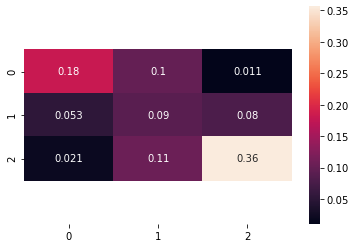

In [100]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

In [101]:
#Bernoulli Naive Bayes

bnb = BernoulliNB ()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Bernoulli Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

The accuracy of the Bernoulli Naive Bayes test is: 64.89 %


In [102]:
cm(y_test, y_pred)

array([[34,  0, 21],
       [16,  6, 20],
       [ 9,  0, 82]])

(4.0, -1.0)

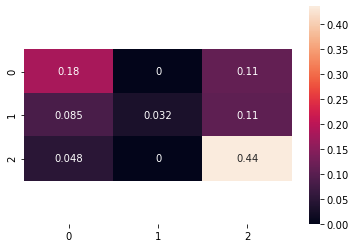

In [103]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

# Bookers probabilities

With the Bet365 picks we can know who was the favorite team in each match(the minor odd), but the question here is, how accurate it´s the betting site prediction to pick the right team?

In [154]:
b365_LaLiga=LaLiga.copy()
b365_Bundesliga=Bundesliga.copy()
b365_SerieA=SerieA.copy()
b365_EPL=EPL.copy()

In [225]:
b365_Bundesliga.drop(['HS','AS','season'],axis=1,inplace=True)

In [226]:
B365_H=b365_Bundesliga['B365H'].to_list()
B365_D=b365_Bundesliga['B365D'].to_list()
B365_A=b365_Bundesliga['B365A'].to_list()

In [227]:

B365Result=[]
c=0
while c<len(B365_H):
    if B365_H[c]<B365_D[c] and B365_H[c]<B365_A[c]:
        B365Result.append('H')
    elif B365_D[c]<B365_H[c] and B365_D[c]<B365_A[c]:
        B365Result.append('D')
    elif B365_A[c]<B365_H[c] and B365_A[c]<B365_D[c]:
        B365Result.append('A')
    elif B365_H[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('H')
    elif B365_A[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('A')
    
        
        
    else:
        B365Result.append('N')
        
    c+=1
        

                
            

In [228]:
set(B365Result)

{'A', 'H'}

In [229]:
len(B365Result)

4608

In [230]:
b365_Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,1.30,5.00,9.50
1,06/08/2005,Duisburg,Stuttgart,1,1,D,2.75,3.25,2.25
2,06/08/2005,FC Koln,Mainz,1,0,H,2.10,3.25,3.00
3,06/08/2005,Hamburg,Nurnberg,3,0,H,1.57,3.40,5.50
4,06/08/2005,Hannover,Hertha,2,2,D,2.40,3.20,2.60
...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,2.37,3.50,2.90
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,1.44,4.50,7.50
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,2.50,3.40,2.80
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,11.00,7.50,1.20


In [231]:
b365_Bundesliga['B365Result']=B365Result

In [233]:
conditions365  = [ b365_Bundesliga['FTR'] =='H', b365_Bundesliga['FTR'] =='D', b365_Bundesliga['FTR'] =='A']
choices365     = [ 1, 0, -1 ]
    
b365_Bundesliga['FTR_N'] = np.select(conditions365, choices365, default=np.nan)

In [234]:
conditions_365  = [ b365_Bundesliga['B365Result'] =='H', b365_Bundesliga['B365Result'] =='D', b365_Bundesliga['B365Result'] =='A']
choices_365     = [ 1, 0, -1 ]
    
b365_Bundesliga['PoissonPredicted_N'] = np.select(conditions_365, choices_365, default=np.nan)

In [235]:
b365_Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result,FTR_N,PoissonPredicted_N
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,1.30,5.00,9.50,H,1.0,1.0
1,06/08/2005,Duisburg,Stuttgart,1,1,D,2.75,3.25,2.25,A,0.0,-1.0
2,06/08/2005,FC Koln,Mainz,1,0,H,2.10,3.25,3.00,H,1.0,1.0
3,06/08/2005,Hamburg,Nurnberg,3,0,H,1.57,3.40,5.50,H,1.0,1.0
4,06/08/2005,Hannover,Hertha,2,2,D,2.40,3.20,2.60,H,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,2.37,3.50,2.90,H,-1.0,1.0
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,1.44,4.50,7.50,H,0.0,1.0
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,2.50,3.40,2.80,H,-1.0,1.0
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,11.00,7.50,1.20,A,1.0,-1.0


In [236]:
tester=b365_Bundesliga.copy()
tester=tester.drop(['Date','HomeTeam','AwayTeam','FTR','B365Result'],axis=1)
tester

,FTHG,FTAG,B365H,B365D,B365A,FTR_N,PoissonPredicted_N
0,3,0,1.30,5.00,9.50,1.0,1.0
1,1,1,2.75,3.25,2.25,0.0,-1.0
2,1,0,2.10,3.25,3.00,1.0,1.0
3,3,0,1.57,3.40,5.50,1.0,1.0
4,2,2,2.40,3.20,2.60,0.0,1.0
...,...,...,...,...,...,...,...
13,1,4,2.37,3.50,2.90,-1.0,1.0
14,1,1,1.44,4.50,7.50,0.0,1.0
15,1,3,2.50,3.40,2.80,-1.0,1.0
16,4,1,11.00,7.50,1.20,1.0,-1.0


In [237]:
X=tester.drop('FTR_N',axis=1)
y=tester[['FTR_N']]

In [238]:
X_train, X_test, y_train, y_test=tts(X,y,test_size=.2)


In [239]:
linreg.fit(X_train, y_train)

LinearRegression()

In [240]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7473928545042265 0.7281908142201423


In [241]:
#Gaussian Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Gaussian Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

The accuracy of the Gaussian Naive Bayes test is: 78.2 %


In [242]:
cm(y_test, y_pred)

array([[230,  58,   3],
       [ 24, 182,  19],
       [ 13,  84, 309]])

(4.0, -1.0)

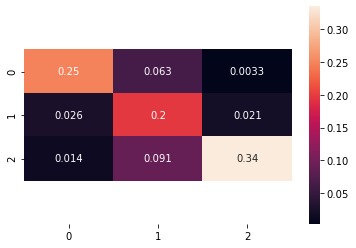

In [243]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)

In [244]:
#Bernoulli Naive Bayes

bnb = BernoulliNB ()
y_pred = bnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of the Bernoulli Naive Bayes test is:",round(acc(y_test, y_pred)*100,2),'%')

The accuracy of the Bernoulli Naive Bayes test is: 69.96 %


In [245]:
cm(y_test, y_pred)

array([[211,   0,  80],
       [ 39,  68, 118],
       [ 40,   0, 366]])

(4.0, -1.0)

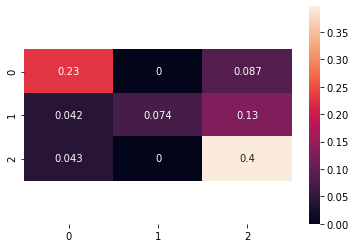

In [246]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+1, t-1)